In [ ]:
#classify the Size_Categorie using SVM

#month	month of the year: 'jan' to 'dec'
#day	day of the week: 'mon' to 'sun'
#FFMC	FFMC index from the FWI system: 18.7 to 96.20
#DMC	DMC index from the FWI system: 1.1 to 291.3
#DC	DC index from the FWI system: 7.9 to 860.6
#ISI	ISI index from the FWI system: 0.0 to 56.10
#temp	temperature in Celsius degrees: 2.2 to 33.30
#RH	relative humidity in %: 15.0 to 100
#wind	wind speed in km/h: 0.40 to 9.40
#rain	outside rain in mm/m2 : 0.0 to 6.4
#Size_Categorie 	the burned area of the forest ( Small , Large)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
data = pd.read_csv('/content/forestfires..csv')

In [ ]:
# Check the column names in your dataset
print(data.columns)

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')


In [ ]:
# Map 'small' to 0 and 'large' to 1 in the 'size_category' column
data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})

In [ ]:
# Select features and target variable
X = data[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = data['size_category']

In [ ]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the SVM model
svm_model = SVC()

In [ ]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', report)

Accuracy: 0.7403846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85        76
           1       0.67      0.07      0.13        28

    accuracy                           0.74       104
   macro avg       0.70      0.53      0.49       104
weighted avg       0.72      0.74      0.65       104



In [ ]:
# Visualizations
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Initialize SVM models with different kernels
linear_svm_model = SVC(kernel='linear')
poly_svm_model = SVC(kernel='poly')
sigmoid_svm_model = SVC(kernel='sigmoid')
rbf_svm_model = SVC(kernel='rbf')

In [ ]:
# Train the SVM models
linear_svm_model.fit(X_train, y_train)
poly_svm_model.fit(X_train, y_train)
sigmoid_svm_model.fit(X_train, y_train)
rbf_svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set for each model
y_pred_linear = linear_svm_model.predict(X_test)
y_pred_poly = poly_svm_model.predict(X_test)
y_pred_sigmoid = sigmoid_svm_model.predict(X_test)
y_pred_rbf = rbf_svm_model.predict(X_test)


In [ ]:
# Evaluate the models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)


In [ ]:
# Print accuracy for each model
print(f'Accuracy (Linear Kernel): {accuracy_linear}')
print(f'Accuracy (Poly Kernel): {accuracy_poly}')
print(f'Accuracy (Sigmoid Kernel): {accuracy_sigmoid}')
print(f'Accuracy (RBF Kernel): {accuracy_rbf}')


Accuracy (Linear Kernel): 0.7307692307692307
Accuracy (Poly Kernel): 0.7211538461538461
Accuracy (Sigmoid Kernel): 0.7307692307692307
Accuracy (RBF Kernel): 0.7403846153846154


Text(0.5, 1.0, 'Count of Size Categories')

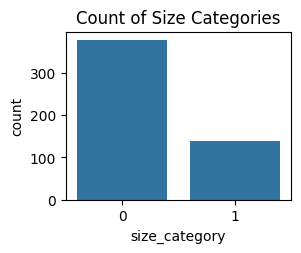

In [ ]:
# Count plot for 'size_category'
plt.subplot(2, 2, 1)
sns.countplot(x='size_category', data=data)
plt.title('Count of Size Categories')

Text(0.5, 1.0, 'Temperature Distribution by Size Category')

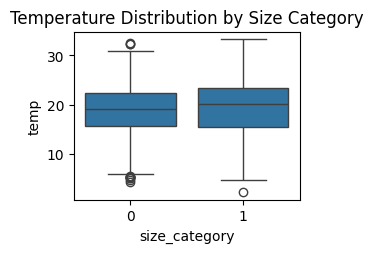

In [ ]:
# Box plot for 'temp' with respect to 'size_category'
plt.subplot(2, 2, 2)
sns.boxplot(x='size_category', y='temp', data=data)
plt.title('Temperature Distribution by Size Category')

Text(0.5, 1.0, 'Scatter Plot of Wind vs Rain with Size Category')

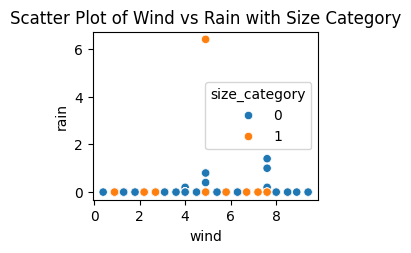

In [ ]:
# Scatter plot for 'wind' and 'rain'
plt.subplot(2, 2, 3)
sns.scatterplot(x='wind', y='rain', hue='size_category', data=data)
plt.title('Scatter Plot of Wind vs Rain with Size Category')

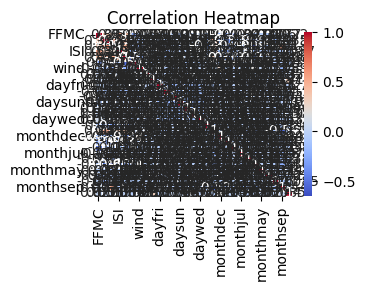

In [ ]:
# Correlation heatmap
plt.subplot(2, 2, 4)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()